In [162]:
#data analysis tools
import pandas as pd
import numpy as np
#data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#for model building and training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
#to calculate metrics or accuracy of the model
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix

In [163]:
df=pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [164]:
df.tail()

,Unnamed: 0,cgpa,iq,placement
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1
99,99,6.2,113.0,1


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [166]:
df.shape

(100, 4)

In [167]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
#Can also write
#df=df.iloc[:,1:]

In [168]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [169]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [170]:
df['placement'].value_counts()

1    50
0    50
Name: placement, dtype: int64

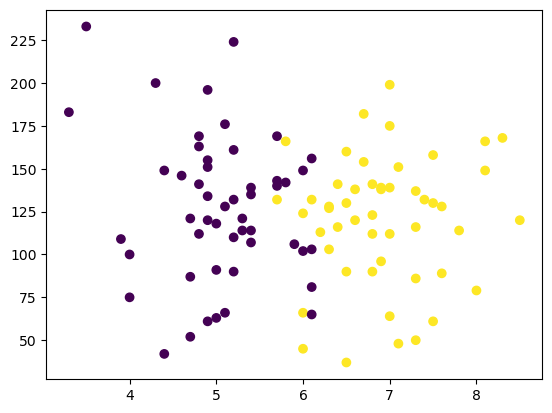

In [171]:
#To show which students are placed , use of color-coded
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.show()

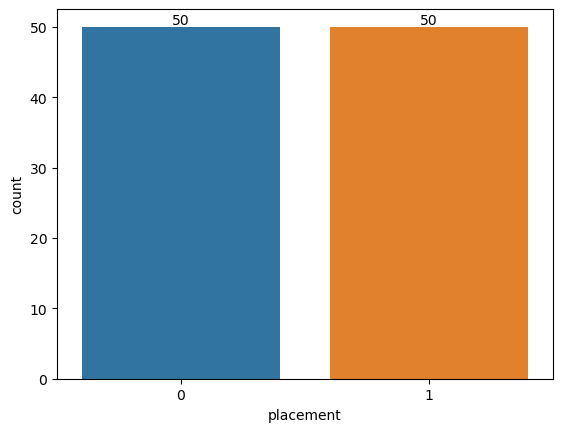

In [172]:
ax=sns.countplot(x='placement',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: >

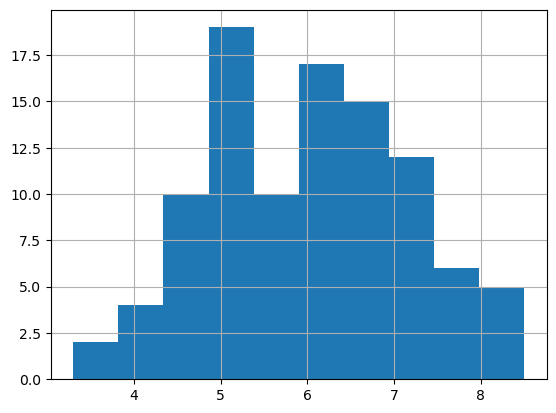

In [173]:
df['cgpa'].hist()

In [174]:
pl1=df.groupby(['cgpa'],as_index=False)['placement'].sum().sort_values(by='placement', ascending=False)
pl1.head(10)

,cgpa,placement
28,7.0,5
23,6.5,4
26,6.8,4
30,7.3,4
21,6.3,3
18,6.0,3
32,7.5,3
27,6.9,3
22,6.4,2
24,6.6,2


<Axes: xlabel='placement', ylabel='cgpa'>

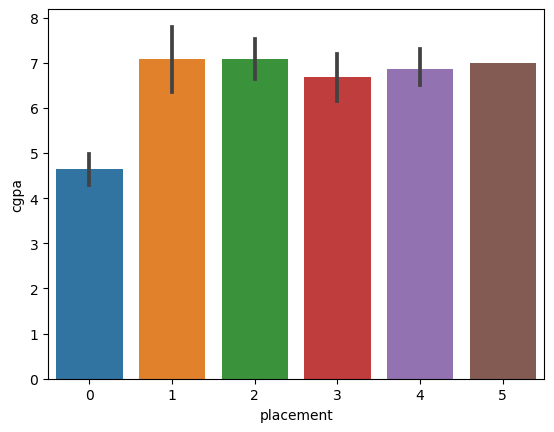

In [175]:
sns.barplot(x='placement',y='cgpa',data=pl1)

In [176]:
pl2=df.groupby(['iq'],as_index=False)['placement'].sum().sort_values(by='placement', ascending=False)
pl2.head(10)

,iq,placement
39,132.0,3
44,139.0,2
30,116.0,2
32,120.0,2
59,166.0,2
37,128.0,2
38,130.0,2
17,90.0,2
46,141.0,2
27,112.0,2


<Axes: xlabel='placement', ylabel='iq'>

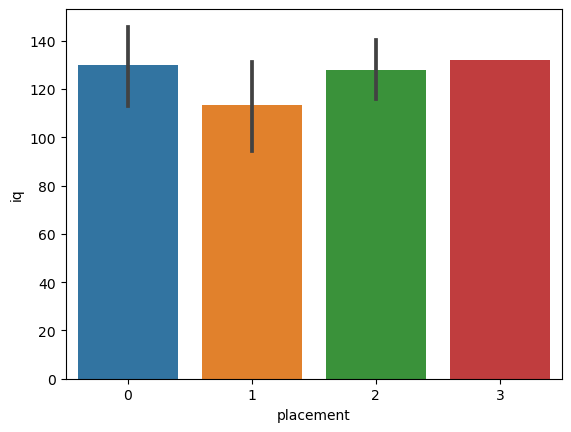

In [177]:
sns.barplot(x='placement',y='iq',data=pl2)

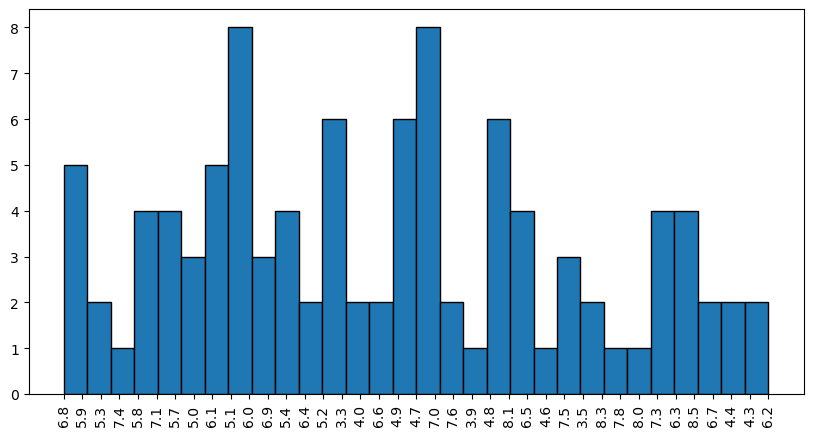

In [178]:
df['cgpa']=df['cgpa'].astype(str)
column_data=df['cgpa']
plt.figure(figsize=(10,5))
plt.hist(column_data,bins=30, edgecolor='Black')
plt.xticks(rotation=90)
plt.show()

In [142]:
#split the data
x_data=df.drop(['placement'],axis=1)
y_data=df[['placement']]

# Logistic Regression Model Building and Predicting

In [143]:
#test_train the data
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=42)

In [144]:
model=LogisticRegression(max_iter=500)
model.fit(x_train,y_train)
prediction=model.predict(x_test)

E:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [145]:
model.score(x_test,y_test)*100

90.0

In [146]:
print("Accuracy is: ",accuracy_score(y_test,prediction)*100)

Accuracy is:  90.0


In [147]:
pred=pd.DataFrame(x_test)
pred['Actual Data']=y_test
pred['Predicted Data']=prediction
pred

,cgpa,iq,Actual Data,Predicted Data
83,7.5,130.0,1,1
53,8.3,168.0,1,1
70,6.3,127.0,1,1
45,6.0,66.0,1,0
44,7.5,61.0,1,1
39,4.6,146.0,0,0
22,4.9,120.0,0,0
80,4.9,196.0,0,0
10,6.0,45.0,1,0
0,6.8,123.0,1,1


In [148]:
pred['Actual Data'].value_counts()

1    15
0    15
Name: Actual Data, dtype: int64

In [149]:
pred['Predicted Data'].value_counts()

0    16
1    14
Name: Predicted Data, dtype: int64

In [150]:
confusion_matrix(y_test,prediction)

array([[14,  1],
       [ 2, 13]], dtype=int64)

# Decision Tree Model Building and Predicting

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=42)

In [152]:
model1=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=4,min_samples_leaf=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=100)

In [153]:
prediction1=model1.predict(x_test)
prediction1

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [154]:
model1.score(x_test,y_test)*100

93.33333333333333

In [155]:
print("Accuracy is: ",accuracy_score(y_test,prediction1)*100)

Accuracy is:  93.33333333333333


In [156]:
pred1=pd.DataFrame(x_test)
pred1['Actual Data']=y_test
pred1['Predicted Data']=prediction1
pred1

,cgpa,iq,Actual Data,Predicted Data
83,7.5,130.0,1,1
53,8.3,168.0,1,1
70,6.3,127.0,1,1
45,6.0,66.0,1,0
44,7.5,61.0,1,1
39,4.6,146.0,0,0
22,4.9,120.0,0,0
80,4.9,196.0,0,0
10,6.0,45.0,1,0
0,6.8,123.0,1,1


In [157]:
pred['Actual Data'].value_counts()

1    15
0    15
Name: Actual Data, dtype: int64

In [158]:
pred['Predicted Data'].value_counts()

0    16
1    14
Name: Predicted Data, dtype: int64

In [159]:
confusion_matrix(y_test,prediction1)

array([[15,  0],
       [ 2, 13]], dtype=int64)

In [179]:
import pickle as pkl
pkl.dump(model1,open('classification.pkl','wb'))